In [ ]:
import os
import numpy as np
import pandas as pd
import regex as re

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#full_UVA_schedule = pd.read_csv("/content/drive/My Drive/Capstone Project/Basketball Data/UVA2020_2021.csv")

In [ ]:
heights = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/height21.csv")

## Creation of the main table

In [ ]:
heights

,Season,TeamName,Size,SizeRank,Hgt5,Hgt5Rank,Hgt4,Hgt4Rank,Hgt3,Hgt3Rank,Hgt2,Hgt2Rank,Hgt1,Hgt1Rank,HgtEff,HgtEffRank,Exp,ExpRank,Bench,BenchRank,Pts5,Pts5Rank,Pts4,Pts4Rank,Pts3,Pts3Rank,Pts2,Pts2Rank,Pts1,Pts1Rank,OR5,OR5Rank,OR4,OR4Rank,OR3,OR3Rank,OR2,OR2Rank,OR1,OR1Rank,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank
0,2021,Abilene Christian,75.10,339,0.92,67,-1.08,300,-1.95,340,-3.07,347,-3.88,342,-0.08,185,2.30,31,36.46,56,28.14,11,22.88,52,19.64,165,16.56,297,12.79,335,39.19,119,25.93,195,13.97,220,11.32,153,9.58,115,24.75,205,25.26,105,19.33,173,15.46,204,15.20,119
1,2021,Air Force,76.80,190,-1.50,319,-0.32,212,0.05,180,-0.11,200,1.31,73,-0.91,298,1.89,131,27.96,255,20.86,142,17.07,261,20.99,124,13.81,334,27.23,22,30.43,263,15.80,321,18.12,138,22.35,13,13.26,34,24.16,221,20.41,274,17.15,257,20.98,36,17.26,54
2,2021,Akron,75.52,327,-1.47,316,0.16,142,0.18,144,-1.57,308,-4.24,345,-0.66,267,1.90,128,33.63,110,17.72,246,14.78,315,18.21,221,18.17,230,31.10,4,24.03,328,27.98,159,27.71,15,10.49,171,9.76,107,22.67,269,30.93,13,24.43,28,10.68,340,11.27,297
3,2021,Alabama,77.69,65,-0.02,157,0.53,93,1.00,54,1.24,47,1.14,98,0.26,123,1.88,140,32.95,124,15.97,296,20.05,148,17.54,243,21.39,118,24.99,57,25.44,316,37.39,33,17.47,151,10.97,159,8.65,141,23.31,257,23.97,147,20.81,124,19.21,72,12.63,245
4,2021,Alabama A&M,76.44,242,0.46,109,0.06,173,-0.45,236,-1.92,323,-0.54,229,0.26,121,0.72,347,34.73,85,13.24,338,31.07,3,14.44,323,17.82,246,23.41,87,28.19,288,38.19,26,15.17,194,8.00,256,10.39,94,25.03,194,22.51,217,23.25,49,14.91,226,14.26,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,77.38,106,-0.37,205,0.06,175,1.13,37,1.68,33,-0.16,190,-0.16,197,1.34,287,20.19,335,27.54,17,21.25,102,20.52,141,16.64,294,14.00,326,33.81,211,30.21,112,25.22,33,7.33,279,3.38,328,27.64,111,27.82,40,20.40,134,13.54,283,10.55,315
353,2021,Wyoming,77.85,51,0.32,124,0.31,119,0.80,79,1.53,36,1.73,39,0.32,113,1.01,333,30.87,170,18.57,220,17.76,239,20.65,136,18.86,207,24.15,68,28.03,291,29.55,128,31.54,5,6.55,300,4.31,310,25.39,178,25.02,116,20.26,139,16.44,158,12.86,239
354,2021,Xavier,77.23,128,-0.29,193,0.28,127,-0.48,242,0.93,70,1.16,95,-0.01,171,1.77,179,32.06,146,26.22,28,13.20,336,18.15,223,22.12,100,20.21,174,34.74,192,33.42,69,14.31,217,10.33,176,7.08,207,34.40,13,20.20,279,14.56,317,16.21,170,14.53,145
355,2021,Yale,0.00,348,-99.00,348,-99.00,348,-99.00,348,-99.00,348,-99.00,348,0.00,160,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348


In [ ]:
miscDef = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/misc21Defense.csv")

In [ ]:
miscDef

,Season,TeamName,FG2Pct,RankFG2Pct,FG3Pct,RankFG3Pct,FTPct,RankFTPct,BlockPct,RankBlockPct,OppFG2Pct,RankOppFG2Pct,OppFG3Pct,RankOppFG3Pct,OppFTPct,RankOppFTPct,OppBlockPct,RankOppBlockPct,FG3Rate,RankFG3Rate,OppFG3Rate,RankOppFG3Rate,ARate,RankARate,OppARate,RankOppARate,StlRate,RankStlRate,OppStlRate,RankOppStlRate,DFP,NSTRate,RankNSTRate,OppNSTRate,RankOppNSTRate
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292
353,2021,Wyoming,53.929539,38,35.653409,78,71.905697,141,5.394605,325,54.445554,313,33.037694,128,71.341463,194,10.975610,314,48.821082,9,31.060606,18,54.083205,107,45.533141,50,0.082072,240,0.079242,66,NaN,8.037414,39,9.961865,139
354,2021,Xavier,54.256671,30,32.530120,229,69.369369,228,10.340633,82,45.742092,30,33.811475,171,73.701299,290,7.369759,65,38.754864,148,37.251908,170,62.648557,9,56.931608,291,0.098123,112,0.078498,59,NaN,8.120522,46,6.564089,345
355,2021,Yale,0.000000,348,0.000000,348,0.000000,348,0.000000,348,100.000000,348,100.000000,348,100.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,1.000000,348,NaN,100.000000,348,0.000000,348


In [ ]:
miscOff = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/misc21Offense.csv")

In [ ]:
miscOff=miscOff.add_prefix("Offensive_")
miscOff= miscOff.rename(columns={"Offensive_Season":"Season", "Offensive_TeamName":"TeamName"})
miscOff

,Season,TeamName,Offensive_FG2Pct,Offensive_RankFG2Pct,Offensive_FG3Pct,Offensive_RankFG3Pct,Offensive_FTPct,Offensive_RankFTPct,Offensive_BlockPct,Offensive_RankBlockPct,Offensive_OppFG2Pct,Offensive_RankOppFG2Pct,Offensive_OppFG3Pct,Offensive_RankOppFG3Pct,Offensive_OppFTPct,Offensive_RankOppFTPct,Offensive_OppBlockPct,Offensive_RankOppBlockPct,Offensive_FG3Rate,Offensive_RankFG3Rate,Offensive_OppFG3Rate,Offensive_RankOppFG3Rate,Offensive_ARate,Offensive_RankARate,Offensive_OppARate,Offensive_RankOppARate,Offensive_StlRate,Offensive_RankStlRate,Offensive_OppStlRate,Offensive_RankOppStlRate,Offensive_DFP,Offensive_NSTRate,Offensive_RankNSTRate,Offensive_OppNSTRate,Offensive_RankOppNSTRate
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292
353,2021,Wyoming,53.929539,38,35.653409,78,71.905697,141,5.394605,325,54.445554,313,33.037694,128,71.341463,194,10.975610,314,48.821082,9,31.060606,18,54.083205,107,45.533141,50,0.082072,240,0.079242,66,NaN,8.037414,39,9.961865,139
354,2021,Xavier,54.256671,30,32.530120,229,69.369369,228,10.340633,82,45.742092,30,33.811475,171,73.701299,290,7.369759,65,38.754864,148,37.251908,170,62.648557,9,56.931608,291,0.098123,112,0.078498,59,NaN,8.120522,46,6.564089,345
355,2021,Yale,0.000000,348,0.000000,348,0.000000,348,0.000000,348,100.000000,348,100.000000,348,100.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,1.000000,348,NaN,100.000000,348,0.000000,348


In [ ]:
miscDef = miscDef.add_prefix("Defensive_")
miscDef = miscDef.rename(columns={"Defensive_Season":"Season","Defensive_TeamName":"TeamName"})
miscDef

,Season,TeamName,Defensive_FG2Pct,Defensive_RankFG2Pct,Defensive_FG3Pct,Defensive_RankFG3Pct,Defensive_FTPct,Defensive_RankFTPct,Defensive_BlockPct,Defensive_RankBlockPct,Defensive_OppFG2Pct,Defensive_RankOppFG2Pct,Defensive_OppFG3Pct,Defensive_RankOppFG3Pct,Defensive_OppFTPct,Defensive_RankOppFTPct,Defensive_OppBlockPct,Defensive_RankOppBlockPct,Defensive_FG3Rate,Defensive_RankFG3Rate,Defensive_OppFG3Rate,Defensive_RankOppFG3Rate,Defensive_ARate,Defensive_RankARate,Defensive_OppARate,Defensive_RankOppARate,Defensive_StlRate,Defensive_RankStlRate,Defensive_OppStlRate,Defensive_RankOppStlRate,Defensive_DFP,Defensive_NSTRate,Defensive_RankNSTRate,Defensive_OppNSTRate,Defensive_RankOppNSTRate
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292
353,2021,Wyoming,53.929539,38,35.653409,78,71.905697,141,5.394605,325,54.445554,313,33.037694,128,71.341463,194,10.975610,314,48.821082,9,31.060606,18,54.083205,107,45.533141,50,0.082072,240,0.079242,66,NaN,8.037414,39,9.961865,139
354,2021,Xavier,54.256671,30,32.530120,229,69.369369,228,10.340633,82,45.742092,30,33.811475,171,73.701299,290,7.369759,65,38.754864,148,37.251908,170,62.648557,9,56.931608,291,0.098123,112,0.078498,59,NaN,8.120522,46,6.564089,345
355,2021,Yale,0.000000,348,0.000000,348,0.000000,348,0.000000,348,100.000000,348,100.000000,348,100.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,1.000000,348,NaN,100.000000,348,0.000000,348


In [ ]:
final_data_frame = pd.concat([miscOff,miscDef,heights],axis=1)

In [ ]:
final_data_frame

,Season,TeamName,Offensive_FG2Pct,Offensive_RankFG2Pct,Offensive_FG3Pct,Offensive_RankFG3Pct,Offensive_FTPct,Offensive_RankFTPct,Offensive_BlockPct,Offensive_RankBlockPct,Offensive_OppFG2Pct,Offensive_RankOppFG2Pct,Offensive_OppFG3Pct,Offensive_RankOppFG3Pct,Offensive_OppFTPct,Offensive_RankOppFTPct,Offensive_OppBlockPct,Offensive_RankOppBlockPct,Offensive_FG3Rate,Offensive_RankFG3Rate,Offensive_OppFG3Rate,Offensive_RankOppFG3Rate,Offensive_ARate,Offensive_RankARate,Offensive_OppARate,Offensive_RankOppARate,Offensive_StlRate,Offensive_RankStlRate,Offensive_OppStlRate,Offensive_RankOppStlRate,Offensive_DFP,Offensive_NSTRate,Offensive_RankNSTRate,Offensive_OppNSTRate,Offensive_RankOppNSTRate,Season,TeamName,Defensive_FG2Pct,Defensive_RankFG2Pct,Defensive_FG3Pct,...,Hgt2,Hgt2Rank,Hgt1,Hgt1Rank,HgtEff,HgtEffRank,Exp,ExpRank,Bench,BenchRank,Pts5,Pts5Rank,Pts4,Pts4Rank,Pts3,Pts3Rank,Pts2,Pts2Rank,Pts1,Pts1Rank,OR5,OR5Rank,OR4,OR4Rank,OR3,OR3Rank,OR2,OR2Rank,OR1,OR1Rank,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2,2021,Abilene Christian,49.315068,187,36.397749,...,-3.07,347,-3.88,342,-0.08,185,2.30,31,36.46,56,28.14,11,22.88,52,19.64,165,16.56,297,12.79,335,39.19,119,25.93,195,13.97,220,11.32,153,9.58,115,24.75,205,25.26,105,19.33,173,15.46,204,15.20,119
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83,2021,Air Force,54.121306,32,33.017078,...,-0.11,200,1.31,73,-0.91,298,1.89,131,27.96,255,20.86,142,17.07,261,20.99,124,13.81,334,27.23,22,30.43,263,15.80,321,18.12,138,22.35,13,13.26,34,24.16,221,20.41,274,17.15,257,20.98,36,17.26,54
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158,2021,Akron,52.700730,62,33.389831,...,-1.57,308,-4.24,345,-0.66,267,1.90,128,33.63,110,17.72,246,14.78,315,18.21,221,18.17,230,31.10,4,24.03,328,27.98,159,27.71,15,10.49,171,9.76,107,22.67,269,30.93,13,24.43,28,10.68,340,11.27,297
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235,2021,Alabama,50.704225,125,35.187058,...,1.24,47,1.14,98,0.26,123,1.88,140,32.95,124,15.97,296,20.05,148,17.54,243,21.39,118,24.99,57,25.44,316,37.39,33,17.47,151,10.97,159,8.65,141,23.31,257,23.97,147,20.81,124,19.21,72,12.63,245
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113,2021,Alabama A&M,45.517241,311,28.819444,...,-1.92,323,-0.54,229,0.26,121,0.72,347,34.73,85,13.24,338,31.07,3,14.44,323,17.82,246,23.41,87,28.19,288,38.19,26,15.17,194,8.00,256,10.39,94,25.03,194,22.51,217,23.25,49,14.91,226,14.26,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292,2021,Wright St.,53.799392,40,36.983471,...,1.68,33,-0.16,1

In [ ]:
final_data_frame = final_data_frame.loc[:,~final_data_frame.columns.duplicated()]

In [ ]:
final_data_frame

,Season,TeamName,Offensive_FG2Pct,Offensive_RankFG2Pct,Offensive_FG3Pct,Offensive_RankFG3Pct,Offensive_FTPct,Offensive_RankFTPct,Offensive_BlockPct,Offensive_RankBlockPct,Offensive_OppFG2Pct,Offensive_RankOppFG2Pct,Offensive_OppFG3Pct,Offensive_RankOppFG3Pct,Offensive_OppFTPct,Offensive_RankOppFTPct,Offensive_OppBlockPct,Offensive_RankOppBlockPct,Offensive_FG3Rate,Offensive_RankFG3Rate,Offensive_OppFG3Rate,Offensive_RankOppFG3Rate,Offensive_ARate,Offensive_RankARate,Offensive_OppARate,Offensive_RankOppARate,Offensive_StlRate,Offensive_RankStlRate,Offensive_OppStlRate,Offensive_RankOppStlRate,Offensive_DFP,Offensive_NSTRate,Offensive_RankNSTRate,Offensive_OppNSTRate,Offensive_RankOppNSTRate,Defensive_FG2Pct,Defensive_RankFG2Pct,Defensive_FG3Pct,Defensive_RankFG3Pct,Defensive_FTPct,...,Hgt2,Hgt2Rank,Hgt1,Hgt1Rank,HgtEff,HgtEffRank,Exp,ExpRank,Bench,BenchRank,Pts5,Pts5Rank,Pts4,Pts4Rank,Pts3,Pts3Rank,Pts2,Pts2Rank,Pts1,Pts1Rank,OR5,OR5Rank,OR4,OR4Rank,OR3,OR3Rank,OR2,OR2Rank,OR1,OR1Rank,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2,49.315068,187,36.397749,56,69.484536,...,-3.07,347,-3.88,342,-0.08,185,2.30,31,36.46,56,28.14,11,22.88,52,19.64,165,16.56,297,12.79,335,39.19,119,25.93,195,13.97,220,11.32,153,9.58,115,24.75,205,25.26,105,19.33,173,15.46,204,15.20,119
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83,54.121306,32,33.017078,205,69.252078,...,-0.11,200,1.31,73,-0.91,298,1.89,131,27.96,255,20.86,142,17.07,261,20.99,124,13.81,334,27.23,22,30.43,263,15.80,321,18.12,138,22.35,13,13.26,34,24.16,221,20.41,274,17.15,257,20.98,36,17.26,54
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158,52.700730,62,33.389831,180,75.447570,...,-1.57,308,-4.24,345,-0.66,267,1.90,128,33.63,110,17.72,246,14.78,315,18.21,221,18.17,230,31.10,4,24.03,328,27.98,159,27.71,15,10.49,171,9.76,107,22.67,269,30.93,13,24.43,28,10.68,340,11.27,297
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235,50.704225,125,35.187058,101,70.751634,...,1.24,47,1.14,98,0.26,123,1.88,140,32.95,124,15.97,296,20.05,148,17.54,243,21.39,118,24.99,57,25.44,316,37.39,33,17.47,151,10.97,159,8.65,141,23.31,257,23.97,147,20.81,124,19.21,72,12.63,245
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113,45.517241,311,28.819444,336,62.681159,...,-1.92,323,-0.54,229,0.26,121,0.72,347,34.73,85,13.24,338,31.07,3,14.44,323,17.82,246,23.41,87,28.19,288,38.19,26,15.17,194,8.00,256,10.39,94,25.03,194,22.51,217,23.25,49,14.91,226,14.26,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292,53.799392,40,36.983471,42,72.440945,...,1.68,33

## Table

In [ ]:
Illinois_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Illinois2020_2021.csv")
Indiana_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Indiana2020_2021csv.csv")
Iowa_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Iowa2020_2021.csv")
Maryland_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Maryland2020_2021.csv")
Michigan_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Michigan2020_2021.csv")
MichiganState2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/MichiganState2020_2021.csv")
Minnesota2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Minnesota2020_2021.csv")
Nebraska2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Nebraska2020_2021.csv")
Northwestern2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Northwestern2020_2021.csv")
OhioState2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/OhioState2020_2021.csv")
PennState2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/PennState2020_2021.csv")
Purdue2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Purdue2020_2021.csv")
Rutgers2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Rutgers2020_2021.csv")
Wisconsin2020_2021_basic = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/Big10/Wisconsin2020_2021.csv")

In [ ]:
offensive_four_factors_2020_2021 = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/offense21.csv")
defensive_four_factors_2020_2021 = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/defense21.csv")

In [ ]:
def clean_opponent_name(dataframe):
  clean_opponent_list = []
  pattern = r"[(\d)]"
  for team in dataframe.index:
    clean_opponent = re.sub(pattern,"",dataframe["Opponent"][team])
    clean_opponent = clean_opponent.replace("()","")
    if clean_opponent == "North Carolina State":
      clean_opponent = "N.C. State"
    if clean_opponent =="Florida State" or clean_opponent == "Florida State ":
      clean_opponent ="Florida St."
    
    clean_opponent = clean_opponent.strip()
    clean_opponent_list.append(clean_opponent)
  dataframe["Official Opponent"] = clean_opponent_list
  dataframe = dataframe.drop(columns=["Opponent"],axis=1)
  return dataframe


In [ ]:
Illinois_2020_2021_cleaned = clean_opponent_name(Illinois_2020_2021_basic)
Indiana_2020_2021_cleaned = clean_opponent_name(Indiana_2020_2021_basic)
Iowa_2020_2021_cleaned = clean_opponent_name(Iowa_2020_2021_basic)
Maryland_2020_2021_cleaned = clean_opponent_name(Maryland_2020_2021_basic)
Michigan_2020_2021_cleaned = clean_opponent_name(Michigan_2020_2021_basic)
MichiganState2020_2021_cleaned = clean_opponent_name(MichiganState2020_2021_basic)
Minnesota2020_2021_cleaned = clean_opponent_name(Minnesota2020_2021_basic)
Nebraska2020_2021_cleaned = clean_opponent_name(Nebraska2020_2021_basic)
Northwestern2020_2021_cleaned = clean_opponent_name(Northwestern2020_2021_basic)
OhioState2020_2021_cleaned = clean_opponent_name(OhioState2020_2021_basic)
PennState2020_2021_cleaned = clean_opponent_name(PennState2020_2021_basic)
Purdue2020_2021_cleaned = clean_opponent_name(Purdue2020_2021_basic)
Rutgers2020_2021_cleaned = clean_opponent_name(Rutgers2020_2021_basic)
Wisconsin2020_2021_cleaned = clean_opponent_name(Wisconsin2020_2021_basic)

In [ ]:
def grab_stats(offensive_factors, defensive_factors, team_name):
  offense_factors = offensive_factors[offensive_factors["TeamName"]== team_name]
  offense_factors = offense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season", "TeamName"],axis =1)
  defense_factors = defensive_factors[defensive_factors["TeamName"]== team_name]
  defense_factors = defense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season","TeamName"],axis =1)
  return offense_factors.values.tolist()[0], defense_factors.values.tolist()[0]


In [ ]:
def grab_misc_stats(dataframe, team_name):
  dataframe = dataframe[dataframe.columns.drop(list(dataframe.filter(regex='Rank')))]
  misc_stats = dataframe[dataframe["TeamName"] == team_name]
  return misc_stats[["Exp","Bench","Size"]].values.tolist()

In [ ]:
UNC_MISC = grab_misc_stats(final_data_frame,"North Carolina")
UNC_MISC

[[1.02, 34.83, 78.84]]

In [ ]:
def return_final_dataframe(dataframe,team_name):
  offense_stats, defense_stats = grab_stats(offensive_four_factors_2020_2021,defensive_four_factors_2020_2021,team_name)
  tm_misc_stats = grab_misc_stats(final_data_frame,team_name)
  new_dataframe = dataframe[["Unnamed: 4","Official Opponent","Tm","Opp"]]
  new_dataframe[["Opp Off eFG%","Opp Off TOP%","Opp Off ORB%", "Opp Off FTR%"]] = np.NaN
  new_dataframe[["Opp Def eFG%","Opp Def TOP%","Opp Def ORB%", "Opp Def FTR%"]] = np.NaN
  for index,row in new_dataframe.iterrows():
    try:
      opponent_off_fac, opponent_def_fac = grab_stats(offensive_four_factors_2020_2021, defensive_four_factors_2020_2021, row["Official Opponent"])
      opponent_misc_stats = grab_misc_stats(final_data_frame, row["Official Opponent"])
      
      final_list = opponent_off_fac + opponent_def_fac + opponent_misc_stats[0]
      new_dataframe.at[ index, "Opp Off eFG%"] = final_list[0]
      new_dataframe.at[ index, "Opp Off TOP%"] = final_list[1]
      new_dataframe.at[ index, "Opp Off ORB%"] = final_list[2]
      new_dataframe.at[ index, "Opp Off FTR%"] = final_list[3]
      new_dataframe.at[ index, "Opp Def eFG%"] = final_list[4]
      new_dataframe.at[ index, "Opp Def TOP%"] = final_list[5]
      new_dataframe.at[ index, "Opp Def ORB%"] = final_list[6]
      new_dataframe.at[ index, "Opp Def FTR%"] = final_list[7]
      new_dataframe.at[ index, "Opp Exp"] = final_list[8]
      new_dataframe.at[ index, "Opp Bench"] = final_list[9]
      new_dataframe.at[ index, "Opp Size"] = final_list[10]
    except IndexError:
      continue
  total_stats = offense_stats + defense_stats + tm_misc_stats[0]
  new_dataframe["tm Off eFG%"] = total_stats[0]
  new_dataframe["tm Off TOP%"] = total_stats[1]
  new_dataframe["tm Off ORB%"] = total_stats[2]
  new_dataframe["tm Off FTR%"] = total_stats[3]
  new_dataframe["tm Def eFG%"] = total_stats[4]
  new_dataframe["tm Def TOP%"] = total_stats[5]
  new_dataframe["tm Def ORB%"] = total_stats[6]
  new_dataframe["tm Def FTR%"] = total_stats[7]
  new_dataframe["tm Exp"] = total_stats[8]
  new_dataframe["tm Bench"] = total_stats[9]
  new_dataframe["tm Size"] = total_stats[10]
  new_dataframe["Final Point Differential"] = new_dataframe["Tm"] - new_dataframe["Opp"]
  new_dataframe = new_dataframe.drop(columns=['Unnamed: 4','Official Opponent'])
  new_dataframe = new_dataframe.dropna()
  return new_dataframe

In [ ]:
Illinois_2020_2021_FINAL = return_final_dataframe(Illinois_2020_2021_cleaned,"Illinois")
Indiana_2020_2021_FINAL = return_final_dataframe(Indiana_2020_2021_cleaned,"Indiana")
Iowa_2020_2021_FINAL = return_final_dataframe(Iowa_2020_2021_cleaned,"Iowa")
Maryland_2020_2021_FINAL = return_final_dataframe(Maryland_2020_2021_cleaned,"Maryland")
Michigan_2020_2021_FINAL = return_final_dataframe(Michigan_2020_2021_cleaned,"Michigan")
MichiganState2020_2021_FINAL = return_final_dataframe(MichiganState2020_2021_cleaned,"Michigan St.")
Minnesota2020_2021_FINAL = return_final_dataframe(Minnesota2020_2021_cleaned,"Minnesota")
Nebraska2020_2021_FINAL = return_final_dataframe(Nebraska2020_2021_cleaned,"Nebraska")
Northwestern2020_2021_FINAL = return_final_dataframe(Northwestern2020_2021_cleaned,"Northwestern")
OhioState2020_2021_FINAL = return_final_dataframe(OhioState2020_2021_cleaned,"Ohio St.")
PennState2020_2021_FINAL = return_final_dataframe(PennState2020_2021_cleaned,"Penn St.")
Purdue2020_2021_FINAL = return_final_dataframe(Purdue2020_2021_cleaned,"Purdue")
Rutgers2020_2021_FINAL = return_final_dataframe(Rutgers2020_2021_cleaned,"Rutgers")
Wisconsin2020_2021_FINAL = return_final_dataframe(Wisconsin2020_2021_cleaned,"Wisconsin")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
pip install dataframe-image

In [ ]:
import dataframe_image as dfi
dfi.export(UVA_2020_2021_FINAL, 'dataframe.png')

In [ ]:
Michigan_2020_2021_FINAL

,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Opp Exp,Opp Bench,Opp Size,tm Off eFG%,tm Off TOP%,tm Off ORB%,tm Off FTR%,tm Def eFG%,tm Def TOP%,tm Def ORB%,tm Def FTR%,tm Exp,tm Bench,tm Size,Final Point Differential
1,81,71,48.652291,17.823275,29.956710,33.207547,55.420754,18.737289,33.583490,21.270005,1.43,20.40,75.83,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,10
4,91,71,54.043921,15.608430,29.704797,28.494912,48.556430,17.577061,30.756014,23.674541,1.80,20.94,76.75,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,20
6,80,69,48.235294,19.609006,23.069106,30.980392,49.783147,18.133059,28.863869,28.438662,1.99,35.69,78.27,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,11
7,84,73,53.158560,16.714653,20.641711,31.838282,48.716453,16.816572,26.465028,24.970828,1.91,22.42,78.09,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,11
8,85,66,50.264151,17.199360,19.872611,26.792453,50.152091,17.944459,25.870647,33.688213,1.50,32.16,77.93,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,19
9,82,57,45.011148,15.592853,29.184549,36.733556,49.709640,18.961680,31.350331,34.320557,1.80,35.77,77.90,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,25
10,77,54,49.944598,13.640654,23.791822,26.260388,47.856315,17.343117,25.166826,28.447277,2.38,28.77,77.97,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,23
11,57,75,45.011148,15.592853,29.184549,36.733556,49.709640,18.961680,31.350331,34.320557,1.80,35.77,77.90,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,-18
12,87,63,53.158560,16.714653,20.641711,31.838282,48.716453,16.816572,26.465028,24.970828,1.91,22.42,78.09,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,24
13,70,53,51.033835,18.639577,32.810867,31.704261,48.828372,16.775619,24.257932,30.145662,1.04,38.68,78.35,54.693367,16.567829,29.62963,30.350438,44.405183,14.779556,24.691358,24.322733,2.12,25.0,77.89,17


## Linear Regression Function

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def perform_linear_regression(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  lin_reg = LinearRegression()
  lin_reg.fit(x,y)
  basketball_predictions = lin_reg.predict(x)
  lin_mse = mean_squared_error(y, basketball_predictions)
  lin_rmse = np.sqrt(lin_mse)
  return lin_rmse

In [ ]:
list_of_final_dataframes = []
list_of_final_dataframes.append(Illinois_2020_2021_FINAL)
list_of_final_dataframes.append(Indiana_2020_2021_FINAL)
list_of_final_dataframes.append(Iowa_2020_2021_FINAL)
list_of_final_dataframes.append(Maryland_2020_2021_FINAL)
list_of_final_dataframes.append(Michigan_2020_2021_FINAL)
list_of_final_dataframes.append(MichiganState2020_2021_FINAL)
list_of_final_dataframes.append(Minnesota2020_2021_FINAL)
list_of_final_dataframes.append(Nebraska2020_2021_FINAL)
list_of_final_dataframes.append(Northwestern2020_2021_FINAL)
list_of_final_dataframes.append(OhioState2020_2021_FINAL)
list_of_final_dataframes.append(PennState2020_2021_FINAL)
list_of_final_dataframes.append(Purdue2020_2021_FINAL)
list_of_final_dataframes.append(Rutgers2020_2021_FINAL)
list_of_final_dataframes.append(Wisconsin2020_2021_FINAL)

In [ ]:
linear_errors = []
for i in range(len(list_of_final_dataframes)):
  linear_errors.append(perform_linear_regression(list_of_final_dataframes[i]))
linear_errors

[8.692257731903413e-15,
 1.1971204246655826e-14,
 2.4575433038650748e-14,
 1.5479551025817328e-14,
 9.510838578450519e-15,
 1.627037529358702e-14,
 1.0879827883664494e-14,
 1.4717291384309936e-14,
 1.3006933665005756e-14,
 1.3053503572900977e-14,
 2.2524124170991938e-14,
 2.25921519920002e-14,
 1.7181655361927175e-14,
 5.863252328668063e-15]

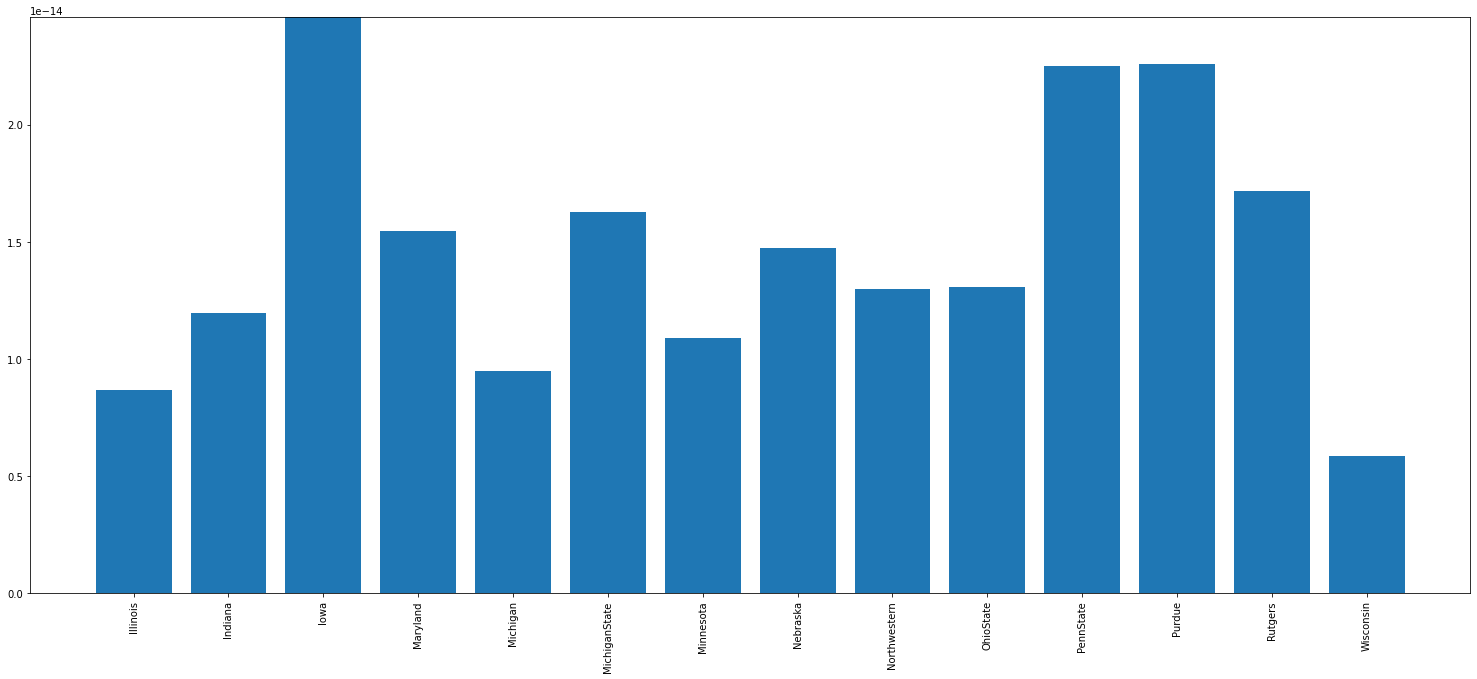

In [ ]:
import matplotlib.pyplot as plt
import math
fig = plt.figure(1, [20,8])
ax = fig.add_axes([0,0,1,1])
teams = ["Illinois","Indiana","Iowa","Maryland","Michigan","MichiganState","Minnesota","Nebraska","Northwestern","OhioState","PennState","Purdue","Rutgers","Wisconsin"]
plt.bar(teams,linear_errors)
low = 0
high = max(linear_errors)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.ylim([0, high])
plt.show()

In [ ]:
Big10_table = pd.concat(list_of_final_dataframes)

In [ ]:
Big10_table

,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Opp Exp,Opp Bench,Opp Size,tm Off eFG%,tm Off TOP%,tm Off ORB%,tm Off FTR%,tm Def eFG%,tm Def TOP%,tm Def ORB%,tm Def FTR%,tm Exp,tm Bench,tm Size,Final Point Differential
0,122.0,60.0,45.422842,18.650850,27.586207,35.832607,51.966783,23.938831,36.082474,31.206294,2.20,45.86,76.04,55.552501,18.136325,32.206759,37.932930,46.476241,16.031615,22.127660,30.058729,1.64,28.15,77.00,62.0
2,77.0,75.0,54.686423,17.073153,28.641371,29.290145,50.746269,19.236532,26.650660,29.282161,1.45,24.61,76.94,55.552501,18.136325,32.206759,37.932930,46.476241,16.031615,22.127660,30.058729,1.64,28.15,77.00,2.0
3,69.0,82.0,56.548250,16.528332,37.293087,26.511135,48.934227,24.433186,30.608175,31.303289,2.01,28.57,76.66,55.552501,18.136325,32.206759,37.932930,46.476241,16.031615,22.127660,30.058729,1.64,28.15,77.00,-13.0
4,83.0,68.0,53.583502,18.331368,32.227488,23.394185,51.316752,19.883862,28.957055,31.894660,0.86,24.72,77.18,55.552501,18.136325,32.206759,37.932930,46.476241,16.031615,22.127660,30.058729,1.64,28.15,77.00,15.0
5,78.0,81.0,50.768203,18.742213,28.523862,37.074148,48.517787,17.983858,28.844115,36.693017,2.47,32.39,77.61,55.552501,18.136325,32.206759,37.932930,46.476241,16.031615,22.127660,30.058729,1.64,28.15,77.00,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,69.0,73.0,51.033835,18.639577,32.810867,31.704261,48.828372,16.775619,24.257932,30.145662,1.04,38.68,78.35,49.944598,13.640654,23.791822,26.260388,47.856315,17.343117,25.166826,28.447277,2.38,28.77,77.97,-4.0
26,73.0,77.0,54.742478,13.334165,30.803177,31.973483,48.826174,16.100777,29.099678,22.177822,1.70,30.77,77.91,49.944598,13.640654,23.791822,26.260388,47.856315,17.343117,25.166826,28.447277,2.38,28.77,77.97,-4.0
28,57.0,62.0,54.742478,13.334165,30.803177,31.973483,48.826174,16.100777,29.099678,22.177822,1.70,30.77,77.91,49.944598,13.640654,23.791822,26.260388,47.856315,17.343117,25.166826,28.447277,2.38,28.77,77.97,-5.0
29,85.0,62.0,48.302300,20.347544,40.913160,34.173056,49.106113,19.048764,26.404494,26.874279,1.02,34.83,78.84,49.944598,13.640654,23.791822,26.260388,47.856315,17.343117,25.166826,28.447277,2.38,28.77,77.97,23.0


In [ ]:
def perform_linear_regression(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  lin_reg = LinearRegression()
  lin_reg.fit(x,y)
  basketball_predictions = lin_reg.predict(x)
  lin_mse = mean_squared_error(y, basketball_predictions)
  lin_rmse = np.sqrt(lin_mse)
  return lin_rmse, basketball_predictions, y

In [ ]:
big10_lin_rmse, big10_basketball_predictions, big10_y = perform_linear_regression(Big10_table)

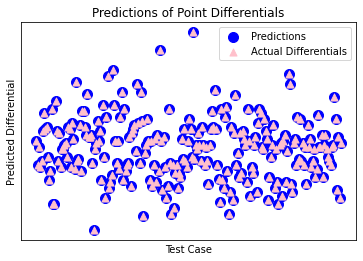

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([x for x in range(len(big10_y))], big10_basketball_predictions, color="blue", marker="o", s=100)
plt.scatter([x for x in range(len(big10_y))], big10_y, color="pink", marker="^", s=50)
#plt.scatter([x for x in range(5)], basketball_predictions, color="blue", marker="o", s=100)
plt.xticks(())
plt.yticks(())
plt.xlabel("Test Case")
plt.ylabel("Predicted Differential")
plt.title("Predictions of Point Differentials")
plt.legend(['Predictions', 'Actual Differentials'])
plt.show()

In [ ]:
big10_lin_rmse

2.7406292559829772e-14

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=2)

In [ ]:
def perform_tree(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  tree_reg.fit(x,y)
  scores = cross_val_score(tree_reg, x, y,
                         scoring="neg_mean_squared_error", cv=10)
  tree_rmse_scores = np.sqrt(-scores)
  return tree_rmse_scores

In [ ]:
from sklearn.model_selection import cross_val_score
Big10_tree = perform_tree(Big10_table)

In [ ]:
np.mean(Big10_tree[0])

4.203173404306164

In [ ]:
average_tree_rmse = []
for i in range(len(list_of_final_dataframes)):
  tree_rmse = perform_tree(list_of_final_dataframes[i])
  average_tree_rmse.append(np.mean(tree_rmse[0]))

In [ ]:
average_tree_rmse

[9.513148795220223,
 35.531676008879735,
 12.103718436910205,
 5.522680508593631,
 10.04987562112089,
 12.041594578792296,
 16.1245154965971,
 15.700318468107582,
 16.446884203398525,
 7.648529270389178,
 9.848857801796104,
 9.300537618869138,
 2.1213203435596424,
 10.0]

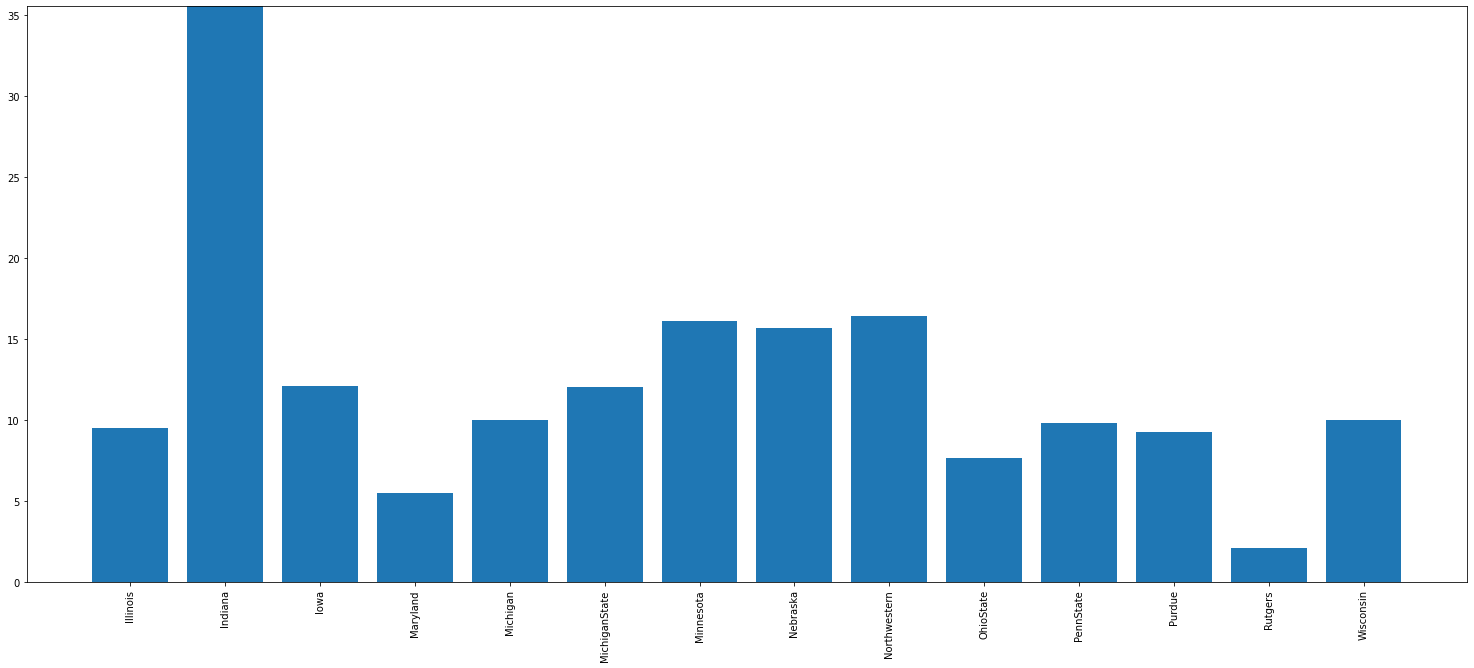

In [ ]:
import matplotlib.pyplot as plt
import math
fig = plt.figure(1, [20,8])
ax = fig.add_axes([0,0,1,1])
teams = ["Illinois","Indiana","Iowa","Maryland","Michigan","MichiganState","Minnesota","Nebraska","Northwestern","OhioState","PennState","Purdue","Rutgers","Wisconsin"]
plt.bar(teams,average_tree_rmse)
low = 0
high = max(average_tree_rmse)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.ylim([0, high])
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def perform_random_forest(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
  random_forest_reg.fit(x,y)
  random_forest_predictions = random_forest_reg.predict(x)
  random_tree_mse = mean_squared_error(y,random_forest_predictions)
  random_tree_rmse = np.sqrt(random_tree_mse)
  return random_tree_rmse

In [ ]:
random_forest_errors = []
for i in range(len(list_of_final_dataframes)):
  random_forest_errors.append(perform_random_forest(list_of_final_dataframes[i]))
random_forest_errors

[5.886470834794723,
 4.789266645322642,
 3.392910255223383,
 3.6202127009334686,
 3.3099405835553406,
 3.999532867460241,
 4.733651644844268,
 3.8001766876216236,
 4.291615259836504,
 2.5709704177389687,
 4.802823388383129,
 4.7445857300717,
 4.447744122336375,
 3.671433106108782]

In [ ]:
print(np.mean(random_forest_errors))

4.147238160302225


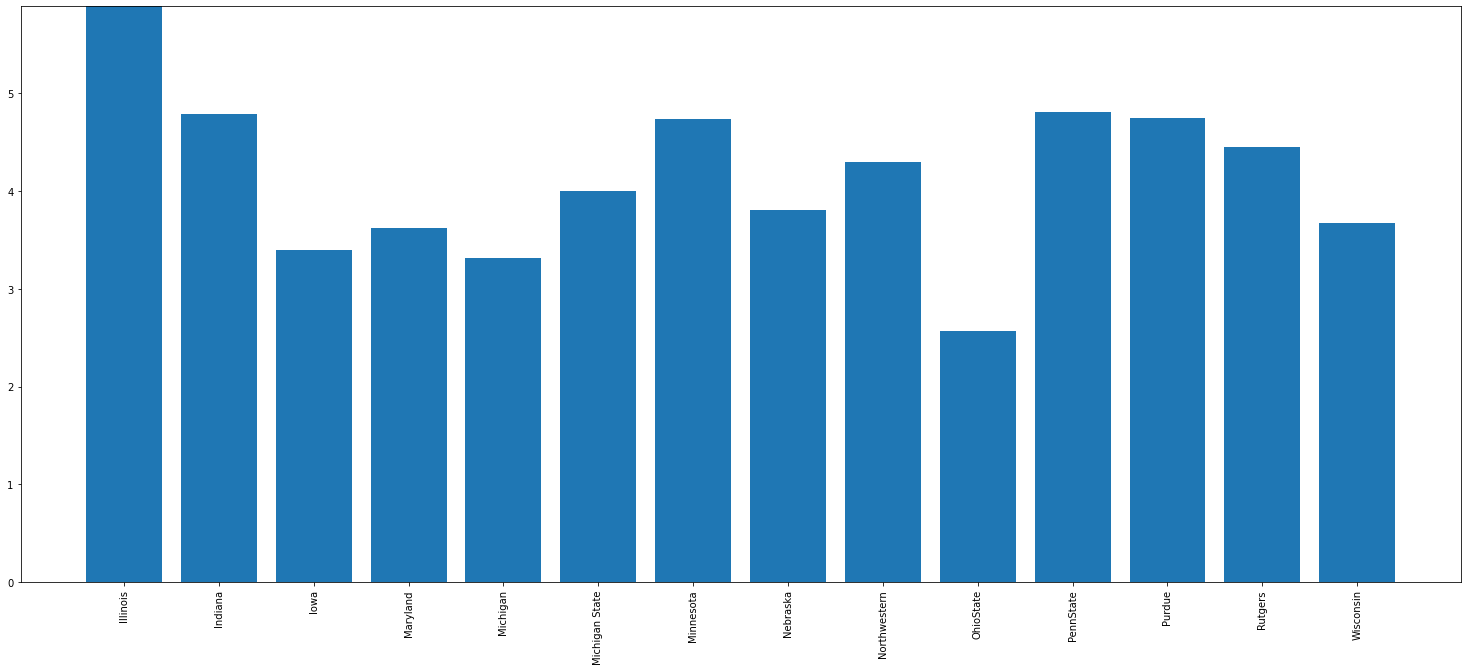

In [ ]:
import matplotlib.pyplot as plt
import math
fig = plt.figure(1, [20,8])
ax = fig.add_axes([0,0,1,1])
teams = ["Illinois","Indiana","Iowa","Maryland","Michigan","Michigan State","Minnesota","Nebraska","Northwestern","OhioState","PennState","Purdue","Rutgers","Wisconsin"]
plt.bar(teams,random_forest_errors)
low = 0
high = max(random_forest_errors)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.ylim([0, high])
plt.show()

## Logistic Regression

In [ ]:
list_log_dataframes = []
for i in range(len(list_of_final_dataframes)):
  log_dataframe = list_of_final_dataframes[i]
  log_dataframe['BinaryResult'] = np.where(log_dataframe['Final Point Differential'] > 0 , 1, 0)
  list_log_dataframes.append(log_dataframe)

In [ ]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
def perform_log(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["BinaryResult"].copy()
  x = train_set.drop(columns="BinaryResult")
  log_reg = LogisticRegression(random_state=0, max_iter=1000).fit(x,y)
  log_basketball_predictions = log_reg.predict(x)
  log_mse = log_loss(y, log_basketball_predictions)
  return log_mse
  

In [ ]:
log_reg_errors = []
for i in range(len(list_log_dataframes)):
  log_reg_errors.append(perform_log(list_log_dataframes[i]))
log_reg_errors

[9.992007221626415e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626415e-16]